# Algorithms of graph

In [1]:
import sys
import matplotlib.pyplot as plt
#change it to your path
BaseAlgPath = "/home/xuhangkun/Code/BaseAlgorithm"
sys.path.append(BaseAlgPath)

In [2]:
#draw the draph
import random
def DrawGraph(gr,color="blue",directed=False,**kwargs):
    """draw undirected graph
    """
    points = []
    for index in range(gr.vertex_num()):
        points.append((random.random(),random.random()))
    for v in range(gr.vertex_num()):
        adjs = gr.adj(v)
        for w in adjs:
            if not directed:
                xx = [points[v][0],points[w][0]]
                yy = [points[v][1],points[w][1]]
                plt.plot(xx,yy,color=color,**kwargs)
            else:
                xx = points[v][0]
                yy = points[v][1]
                dx = points[w][0] - points[v][0]
                dy = points[w][1] - points[v][1]
                plt.arrow(xx,yy,dx,dy,color=color,**kwargs)
    return points

def DrawEWGraph(gr,color="blue",directed=False,**kwargs):
    """draw undirected graph
    """
    points = []
    for index in range(gr.vertex_num()):
        points.append((random.random(),random.random()))
    for index in range(len(points)):
        plt.annotate(index,points[index],color="red")
    for v in range(gr.vertex_num()):
        adjs = gr.adj(v)
        for edge_w in adjs:
            w = edge_w.other(v)
            if not directed:
                xx = [points[v][0],points[w][0]]
                yy = [points[v][1],points[w][1]]
                plt.plot(xx,yy,color=color,**kwargs)
            else:
                xx = points[v][0]
                yy = points[v][1]
                dx = points[w][0] - points[v][0]
                dy = points[w][1] - points[v][1]
                plt.arrow(xx,yy,dx,dy,color=color,**kwargs)
    return points

## Undirected graph

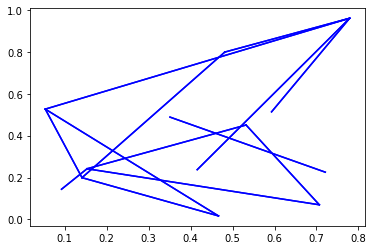

In [3]:
from BaseAlgorithm.graph.graph import Graph,DepthFirstPath,BreadthFirstPaths
graph = Graph()
graph.load_graph('./data/tinyG.txt')
fig_graph = plt.figure()
DrawGraph(graph,directed=False)
plt.show()

## MST

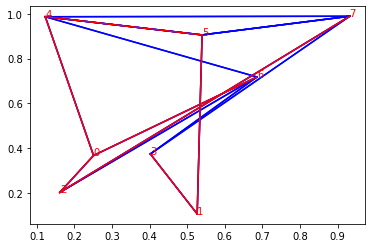

In [4]:
from BaseAlgorithm.graph.edgeweightedgraph import EdgeWeightedGraph,PrimMST
edge_weighted_gr = EdgeWeightedGraph()
edge_weighted_gr.load_graph("./data/tinyEWG.txt")
fig_tinyEWG = plt.figure()
points = DrawEWGraph(edge_weighted_gr,color="blue")
prim_mst = PrimMST(edge_weighted_gr)
mst = prim_mst.mst()
#print(mst.empty())
while not mst.empty():
    edge = mst.get()
    v = edge.either()    
    w = edge.other(v)
    xx = [points[v][0],points[w][0]]
    yy = [points[v][1],points[w][1]]
    plt.plot(xx,yy,color="red")
plt.show()

## Shortest path

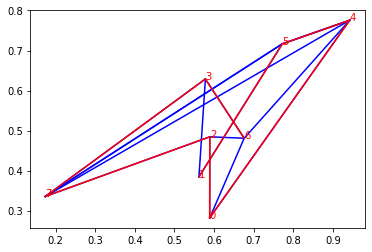

In [5]:
#load graph
from BaseAlgorithm.graph.edgeweighteddigraph import EdgeWeightedDiGraph,DijkstraSP,BellmanFordSP
edge_weighted_digr = EdgeWeightedDiGraph()
edge_weighted_digr.load_graph("./data/tinyEWG.txt")
fig_digr_tinyEWG = plt.figure()
points = DrawEWGraph(edge_weighted_digr,color="blue")
#Shortest Path Alg
#dijsp = DijkstraSP(edge_weighted_digr,0)
bell = BellmanFordSP(edge_weighted_digr,0)
edges = dijsp.edges()
for edge in edges:
    if not edge:
        continue
    v = edge.either()    
    w = edge.other(v)
    xx = [points[v][0],points[w][0]]
    yy = [points[v][1],points[w][1]]
    plt.plot(xx,yy,color="red")
plt.show()